In [202]:
#importing the libraries
import pandas as pd

In [203]:
#using a csv file I saved earlier with the data extracted from API
dfapi=pd.read_csv('marvelcomicsapi.csv')
dfapi.drop('Unnamed: 0',axis=1, inplace = True)
dfapi['name']=dfapi['name'].str.strip()
dfapi.head()

,appearnces,description,gender,name,origin
0,14800,A long-lived mutant with the rage of a beast a...,male,Wolverine,mutant
1,5260,"Among the most powerful, recognizable, and inf...",male,Magneto,mutant
2,10320,"During World War II, Steve Rogers volunteered ...",male,Captain America,human
3,14955,Peter Parker was bitten by a radioactive spide...,male,Spider-Man,radiation
4,9268,Gifted with the power to control the elemental...,female,Storm,mutant


In [204]:
#I used pickle for this data frame after I scraped data from Marvel.com
dfscraped=pd.read_pickle('marvelscrapedf.pickle')
dfscraped['name']=dfscraped['name'].str.strip()
dfscraped.head()

,name,description,hair,eye,universe,identity
0,3-D Man,The 3-D Man was a 1950's hero who came about t...,"gray, reddish-blonde","brown, blue, obscured by red/green goggles",Marvel,secret
1,8-Ball,Jeff Hagees was once a designer of missile pro...,red,blue,Marvel,secret
2,A,The woman known only as A is one half of the m...,blonde,NaN,Marvel,secret
3,Jesse Aaronson,"Jesse, alongside his brother Terry, was a memb...",black,brown,Age of Apocalypse,publicly known
4,Terry Aaronson,"Terry, also known as King Beldam or Christophe...",bald,brown,Age of Apocalypse,publicly known


In [205]:
#reading from the csv file I saved earlier when cleaning data from a csv file.
dfile=pd.read_csv('marvelscomics.csv')
dfile.drop('Unnamed: 0', axis=1, inplace = True)
dfile['name']=dfile['name'].str.strip()
dfile.head()

,name,identity,personality,eye,hair,gender,alive,year
0,Spider-Man,secret,good,hazel,brown,male,living,1962
1,Captain America,public,good,blue,white,male,living,1941
2,Wolverine,public,neutral,blue,black,male,living,1974
3,Iron Man,public,good,blue,black,male,living,1963
4,Thor,no dual,good,blue,blond,male,living,1950


In [206]:
from functools import reduce

I am going to work on joining the data frames with the method that is similar to inner join. The data won't have missing values and will be clean in the end.

In [207]:
#creating a list of data frames that I created before
dfs = [dfscraped, dfile, dfapi] 

In [208]:
#merging the data frames on the column "name"
df_final = reduce(lambda left,right: pd.merge(left,right,on='name'), dfs)
df_final.head()

,name,description_x,hair_x,eye_x,universe,identity_x,identity_y,personality,eye_y,hair_y,gender_x,alive,year,appearnces,description_y,gender_y,origin
0,A,The woman known only as A is one half of the m...,blonde,NaN,Marvel,secret,secret,bad,NaN,blond,female,living,2001,17,A is one half of the mercenary duo known as th...,female,human
1,Abomination,"Formerly known as Emil Blonsky, a spy of Sovie...",none; blond,green; blue,Marvel,secret,secret,neutral,blue,no,male,living,2011,465,"Craving for the power of a Hulk, Emil Blonsky ...",male,radiation
2,Ace,When the titanic threat known as Terminus ramp...,NaN,blue,Marvel,secret,secret,good,blue,NaN,male,living,2006,29,Ace was Illyana Rasputin's friend in the Age o...,female,human
3,Achebe,Reverend Doctor Michael Ibn al-Hajj Achebe's t...,black,brown,Marvel,secret,secret,bad,brown,black,male,living,1999,28,An enemy of T'Challa that sold his soul to Mep...,male,human
4,Acrobat,The self-proclaimed “World’s Greatest Acrobat“...,black,brown,Marvel,known to authorities,secret,bad,NaN,black,male,living,1947,23,Acrobat is a professional criminal that is a h...,male,human


In [209]:
#checking the missing values
df_final.isnull().sum()

name               0
description_x      0
hair_x            53
eye_x             78
universe           0
identity_x         0
identity_y         0
personality        0
eye_y            247
hair_y           120
gender_x          47
alive              0
year               0
appearnces         0
description_y     25
gender_y           0
origin             0
dtype: int64

In [210]:
#checking the dimensions
df_final.shape

(708, 17)

In [211]:
#since I have a few identical columns present in at least two of the three data frames,
#I filled the missing in one identical column with values from the other identical column 
df_final['hair'] = df_final['hair_y'].fillna(df_final['hair_x'])
df_final['eye'] = df_final['eye_x'].fillna(df_final['eye_y'])
#removing the identical columns after the missing values have been replaced and put into a new column
df_final.drop(['description_y', 'gender_x','hair_x', 'hair_y', 'eye_x', 'eye_y', 'identity_x' ], axis=1, inplace=True)
df_final.isnull().sum()

name              0
description_x     0
universe          0
identity_y        0
personality       0
alive             0
year              0
appearnces        0
gender_y          0
origin            0
hair             28
eye              51
dtype: int64

In [212]:
#removing the remainder of the missing values
df_final=df_final.dropna(how='any', subset=['hair'])
df_final=df_final.dropna(how='any', subset=['eye'])
df_final.shape

(645, 12)

In [213]:
#renaming some of the columns for the final version of the data frame
df_final.rename(columns={'description_x':'description',
                          'identity_y':'identity',
                         'appearnces':'appearances',
                         'gender_y':'gender'}, 
                 inplace=True)

In [214]:
df_final.tail()

,name,description,universe,identity,personality,alive,year,appearances,gender,origin,hair,eye
703,Zorr,"The Alpha Primitive, android Zorr was built by...",Marvel,public,bad,deceased,1976,7,male,alien,none,white
704,Zzzax,"A chain reaction in an atomic reactor, a resul...",Marvel,public,bad,living,1973,130,other,other,no,white
705,Hit-Monkey,"As a Japanese macaque (Macaca fuscata, also kn...",Marvel,secret,neutral,living,2010,73,male,animal,grey,amber
706,Gilgamesh,Gilgamesh has typical Eternal powers such as ...,Marvel,secret,good,living,1977,110,male,godeternal,black,blue
707,Makkari,Makkari possesses the conventional abilitie...,Marvel,secret,good,living,1940,215,male,godeternal,strawberry blond,blue


In [215]:
#resetting the index
df_final.reset_index(drop=True, inplace=True)
df_final.tail(5)

,name,description,universe,identity,personality,alive,year,appearances,gender,origin,hair,eye
640,Zorr,"The Alpha Primitive, android Zorr was built by...",Marvel,public,bad,deceased,1976,7,male,alien,none,white
641,Zzzax,"A chain reaction in an atomic reactor, a resul...",Marvel,public,bad,living,1973,130,other,other,no,white
642,Hit-Monkey,"As a Japanese macaque (Macaca fuscata, also kn...",Marvel,secret,neutral,living,2010,73,male,animal,grey,amber
643,Gilgamesh,Gilgamesh has typical Eternal powers such as ...,Marvel,secret,good,living,1977,110,male,godeternal,black,blue
644,Makkari,Makkari possesses the conventional abilitie...,Marvel,secret,good,living,1940,215,male,godeternal,strawberry blond,blue


In [ ]:
#saving the final version to a pickle 
df_final.to_pickle('database.pickle')

The code that is commented out would let me do a similar merge except for it would be an outer join with NAN values. Just in case putting it here if I ever need this type of merging. 

In [99]:
#this would be the code that would not be an inner join and will contain None values after the three data frames are merged 
#df_new=dfscraped.merge(dfile, how='left', left_on='name', right_on='name').merge(dfapi, how='left', left_on='name', right_on='name')
#df_new['hair'] = df_new['hair_y'].fillna(df_new['hair_x'])
#df_new['eye'] = df_new['eye_x'].fillna(df_new['eye_y'])
#df_new['gender']=df_new['gender_x'].fillna(df_new['gender_y'])
#df_new.drop(['description_y', 'gender_x','gender_y','hair_x', 'hair_y', 'eye_x', 'eye_y', 'identity_y' ], axis=1, inplace=True)
#df_new.rename(columns={'description_x':'description',
                          #'identity_y':'identity',
                         #'appearnces':'appearances',
                         #'gender_y':'gender'}, 
                 #inplace=True)

Importing the data frame into SQLite data base

In [220]:
import sqlite3

In [221]:
#establishing a connection and creating a cursor
conn = sqlite3.connect('test.db')
c = conn.cursor()

In [222]:
#creating a table
dropTable = 'DROP TABLE marvels'
c.execute(dropTable)
createTable = "CREATE TABLE IF NOT EXISTS marvels(name text, description text,universe text,identity text,personality text,alive text,year integer,appearances integer, gender text,origin text,hair text,eye text)"
c.execute(createTable)

conn.commit()

#test = conn.execute('SELECT * from marvels')

In [223]:
#loading data to SQLite
df_final.to_sql('marvels', conn, if_exists='append', index=False)

Visualizing some of the data

In [231]:
#importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

Visualization #1. Bar graph. Gender Representation

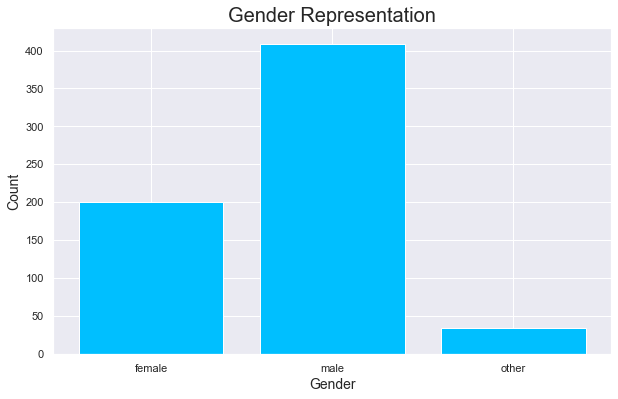

In [330]:
#looking at the representation of genre variable for the Marvel comic characters with the help of a bar graph
c.execute('SELECT gender FROM marvels')
data = c.fetchall()
gender = []
for row in data:
    gender.append(row[0])
keys, counts = np.unique(gender, return_counts=True)
plt.figure(figsize=(10,6))
plt.title('Gender Representation', fontsize=20)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.bar(keys, counts,color = 'deepskyblue')
plt.show()

Visualization #2. Pie Chart. Identity Representation

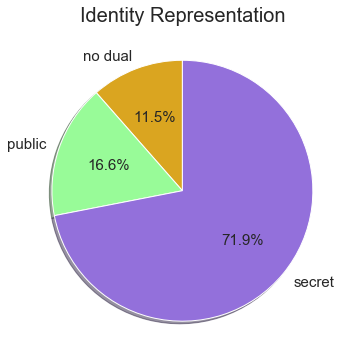

In [331]:
#checking the representation of the variable "identity" with the help of the pie chart.
c.execute('SELECT identity FROM marvels')
data = c.fetchall()
identity = []
for row in data:
    identity.append(row[0])
colors=('goldenrod','palegreen', 'mediumpurple')
keys, counts = np.unique(identity, return_counts=True)
plt.figure(figsize=(10,6))
plt.pie(counts, labels=keys,autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90,textprops={'fontsize': 15})
plt.rcParams['font.size'] = 25
plt.title("Identity Representation", fontsize=20)
plt.show()

Visualization #3. Histogram of number of appearances of characters in comics. 

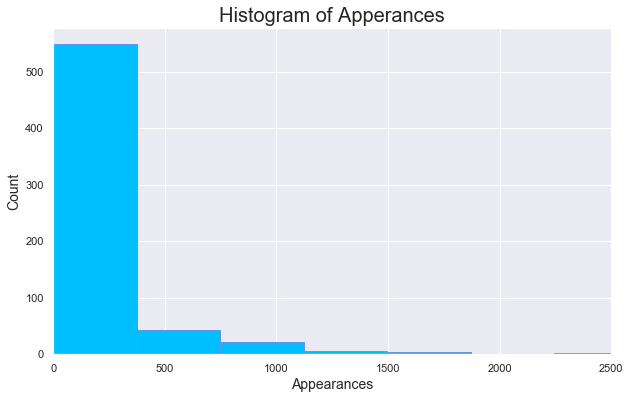

In [340]:
#creating a histogram of the variable "appearances"
c.execute('SELECT appearances FROM marvels')
data = c.fetchall()
appearances = []
for row in data:
    appearances.append(row[0])
plt.figure(figsize=(10,6))
plt.hist(appearances, color = 'deepskyblue', edgecolor='cornflowerblue', bins=40)
plt.title('Histogram of Apperances', fontsize=20)
plt.xlim(0,2500)
plt.xlabel("Appearances", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Visualization #4. Bar graph of personality characters that are deceased. 
Testing hypothesis that bad characters are more likely to die. 

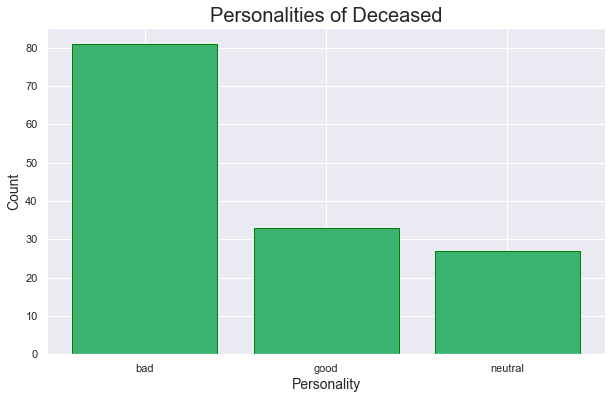

In [335]:
#creating a bar graph of personality variable of the deceased characters
c.execute("SELECT personality FROM marvels WHERE alive='deceased'")
data=c.fetchall()
deceased_pers=[]
for row in data:
    deceased_pers.append(row[0])
keys, counts = np.unique(deceased_pers, return_counts=True)
plt.figure(figsize=(10,6))
plt.title('Personalities of Deceased', fontsize=20)
plt.xlabel("Personality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.bar(keys, counts,color = 'mediumseagreen', edgecolor='green')
plt.show()

Visualization #5.Representation of Years when the comic character first appeared.

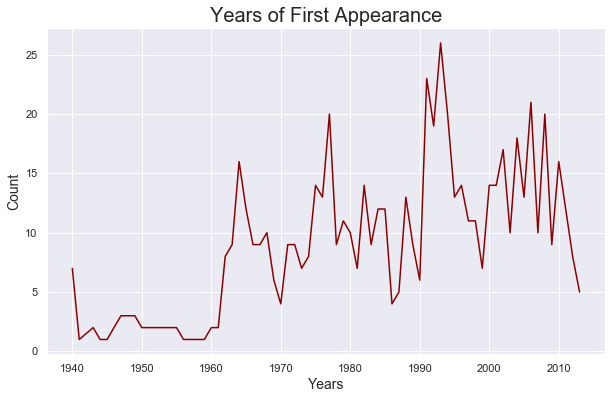

In [341]:
#creating a line chart to see the distribution of years of characters' first appearances in comics.
c.execute("SELECT year FROM marvels")
data=c.fetchall()
year=[]
for row in data:
    year.append(row[0])
keys, counts = np.unique(year, return_counts=True)
plt.figure(figsize=(10,6))
plt.plot(keys, counts, color='darkred')
plt.title('Years of First Appearance', fontsize=20)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Visualization #6. Bar chart of the characters' origins from Universe "Age of Apocalypse"

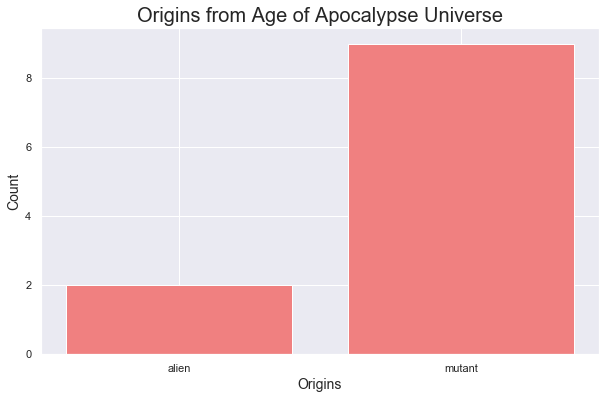

In [342]:
#creating a bar graph of characters' origins from Universe "Age of Apocalypse"
c.execute("SELECT origin  FROM marvels WHERE universe='Age of Apocalypse'")
data=c.fetchall()
origin_u=[]
for row in data:
    origin_u.append(row[0])
keys, counts = np.unique(origin_u, return_counts=True)
plt.figure(figsize=(10,6))
plt.bar(keys, counts, color='lightcoral')
plt.title('Origins from Age of Apocalypse Universe', fontsize=20)
plt.xlabel("Origins", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

Visualization #7. Representations of identities of differenet types of characters' personalities.

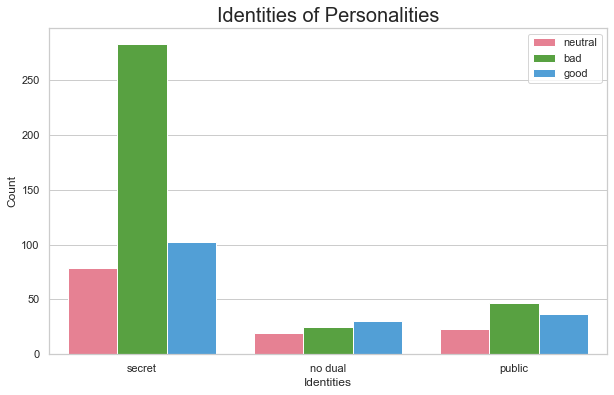

In [352]:
#creating  bar graphs of identities of differenet types of characters' personalities.
#using seaborn
import seaborn as sns
c.execute("SELECT identity, personality  FROM marvels ")
data=c.fetchall()
identity=[]
personality=[]
for row in data:
    identity.append(row[0])
    personality.append(row[1])
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")
plt.title('Identities of Personalities',fontsize=20)
ax = sns.countplot(x=identity, hue=personality, palette="husl").set( xlabel = 'Identities', ylabel = 'Count' )


Visualization #8. Wordcloud of Universes of characters

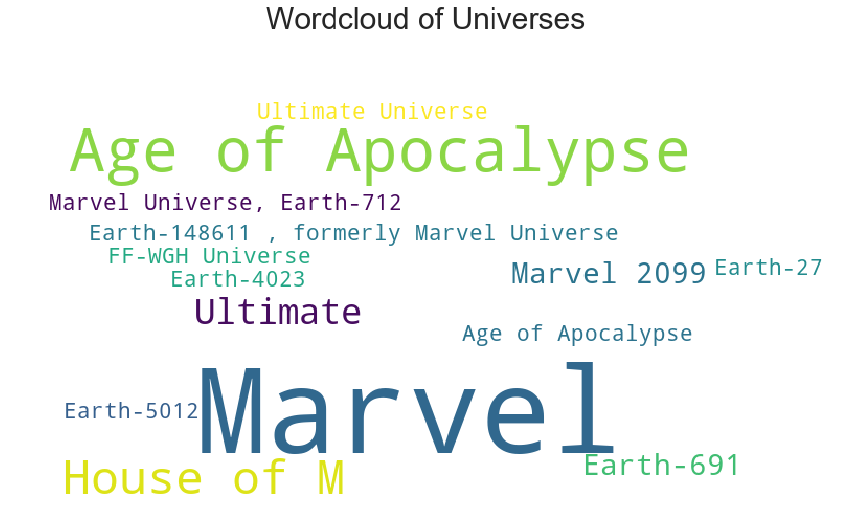

In [369]:
#!pip install wordcloud of Universes of characters
c.execute("SELECT universe FROM marvels")
data=c.fetchall()
universe=[]
for row in data:
    universe.append(row[0])
from collections import Counter
word_could_dict=Counter(universe)
wordcloud = WordCloud(width = 800, height = 400,background_color="white").generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('yourfile.png', bbox_inches='tight')
plt.title('Wordcloud of Universes\n\n', loc='center', fontsize=30)
plt.show()